In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud

In [4]:
odf = pd.read_csv('Processed_reviews.csv')
odf['Helpful %'] = np.where(odf['HelpfulnessDenominator'] > 0, odf['HelpfulnessNumerator'] / odf['HelpfulnessDenominator'], -1)
odf['% Upvote'] = pd.cut(odf['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
odf.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text,date,sentiment,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,2011-04-27,1,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...,2012-09-07,-1,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...,2008-08-18,1,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,2011-06-13,-1,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,2012-10-21,1,-1.0,Empty


Text(0.5, 1.0, 'How helpful users find among user scores')

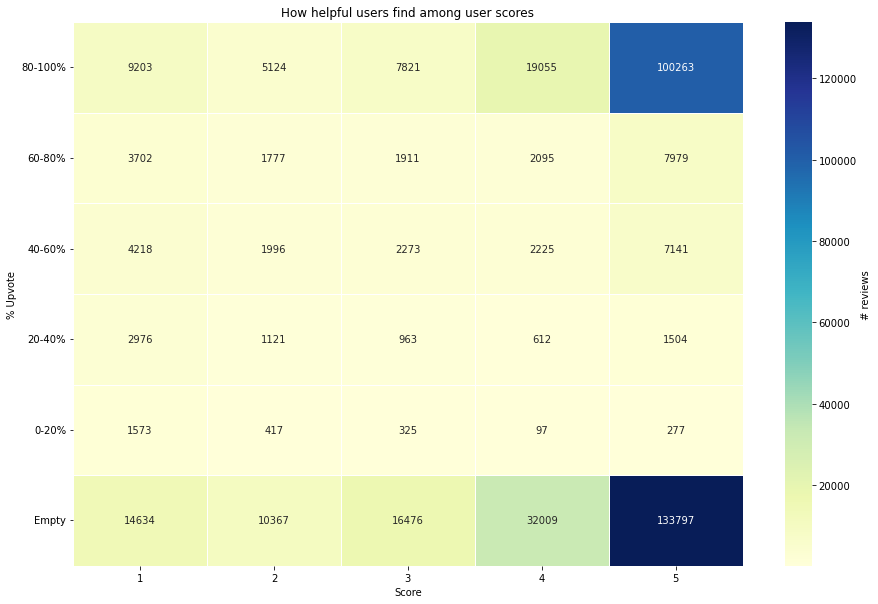

In [5]:
df_s = odf.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

In [6]:
df = odf[odf['Score'] != 3]
X = df['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_dict)

In [7]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 114966
# train records: 273123
# test records: 91041


/Users/federicosuarezpalavecino/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/federicosuarezpalavecino/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model Accuracy: 0.9247481903757647

-Top 20 positive-
      Word  Coefficient
pleasantly     3.948091
 addicting     2.998876
 skeptical     2.845832
  downside     2.723795
  drawback     2.577899
    delish     2.222197
    divine     2.197375
    brings     2.195588
 delighted     2.158357
   easiest     2.093529
    solved     2.084031
   healing     2.027786
 addictive     2.020248
 satisfies     1.996917
    finest     1.985050
 delicious     1.984491
      whim     1.931909
   welcome     1.926052
    unsure     1.909563
    hooked     1.908935

-Top 20 negative-
          Word  Coefficient
       defeats    -2.207035
       culprit    -2.219062
 dissapointing    -2.336440
     redeeming    -2.346222
     cancelled    -2.382177
           ick    -2.384546
      canceled    -2.425656
        lacked    -2.465104
    returnable    -2.480890
           ugh    -2.510001
disappointment    -2.580091
        ripoff    -2.709497
   embarrassed    -2.724836
   unappealing    -2.823412
   

In [8]:
text_fit(X, y, c, DummyClassifier(),0)


# features: 114966
# train records: 273123
# test records: 91041
Model Accuracy: 0.8422029634999616


In [9]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 114966
# train records: 273123
# test records: 91041


/Users/federicosuarezpalavecino/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/federicosuarezpalavecino/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model Accuracy: 0.9264177678188947

-Top 20 positive-
      Word  Coefficient
     great    13.674722
 delicious    12.203017
      best    11.469540
   perfect    10.110406
 excellent     9.263702
    highly     8.924551
     loves     8.593619
 wonderful     8.110922
      love     8.008768
   amazing     7.445034
      good     7.391174
   awesome     7.225314
   pleased     6.622956
    smooth     6.587026
  favorite     6.564346
      nice     6.463921
      glad     6.340114
pleasantly     6.328583
    hooked     6.288312
     yummy     6.096701

-Top 20 negative-
          Word  Coefficient
           rip    -5.366685
         gross    -5.557286
         worse    -5.843388
          yuck    -5.932599
          weak    -5.972295
    disgusting    -6.049012
         waste    -6.156237
         bland    -6.177452
     tasteless    -6.195804
         stale    -6.409127
 unfortunately    -6.735148
         threw    -6.778351
        return    -6.808908
      horrible    -7.454994
  d

In [10]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 3933091
# train records: 273123
# test records: 91041


/Users/federicosuarezpalavecino/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/federicosuarezpalavecino/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model Accuracy: 0.9249019672455268

-Top 20 positive-
            Word  Coefficient
           great    20.483519
            best    16.794376
       delicious    16.353764
         perfect    13.236566
            love    12.501093
       excellent    12.030375
           loves    11.743971
            good    11.137221
       wonderful    10.746955
        favorite     9.650749
            nice     9.641179
         amazing     9.025692
            easy     8.731530
         awesome     8.475309
           tasty     8.402272
           happy     8.378019
          highly     8.179111
         pleased     8.141946
          smooth     7.865076
highly recommend     7.728068

-Top 20 negative-
          Word  Coefficient
           bad    -7.396653
         waste    -7.402371
     tasteless    -7.486853
         worse    -7.496572
       thought    -7.520068
    disgusting    -7.670961
         money    -7.778458
         bland    -8.645561
          weak    -8.653475
         threw   

In [16]:
df = df[df['Score'] == 5]
df = df[df['% Upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
df.shape

X = df['Text']
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = df['% Upvote'].map(y_dict)

print('Class distribution:')
print(y.value_counts())

Class distribution:
1.0    108242
0.0      1781
Name: % Upvote, dtype: int64


In [22]:
df_s = pd.DataFrame(data = [X,y]).T

Downvote_records = len(df_s[df_s['% Upvote'] == 0])
Downvote_indices = np.array(df_s[df_s['% Upvote'] == 0].index)

Upvote_indices = df_s[df_s['% Upvote'] == 1].index

random_upvote_indices = np.random.choice(Upvote_indices, Downvote_records, replace = False)
random_upvote_indices = np.array(random_upvote_indices)

under_sample_indices = np.concatenate([Downvote_indices,random_upvote_indices])

under_sample_data = df_s.loc[under_sample_indices, :]
X_u = under_sample_data['Text']
under_sample_data['% Upvote'] = under_sample_data['% Upvote'].astype(int)
y_u = under_sample_data['% Upvote']


print("Percentage of upvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 1])/len(under_sample_data))
print("Percentage of downvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 0])/len(under_sample_data))
print("Total number of records in resampled data: ", len(under_sample_data))

Percentage of upvote transactions:  0.5
Percentage of downvote transactions:  0.5
Total number of records in resampled data:  3562


In [23]:
c = CountVectorizer(stop_words = 'english')

text_fit(X_u, y_u, c, LogisticRegression())

# features: 14295
# train records: 2671
# test records: 891
Model Accuracy: 0.621773288439955

-Top 20 positive-
        Word  Coefficient
        kick     1.197630
    dressing     1.130411
   favorites     1.106286
       solid     1.085131
       hours     1.084637
      keurig     1.033077
      plenty     1.026836
supermarkets     1.019970
       soups     1.016475
        pops     1.013296
       words     1.000824
        heat     0.992495
        soon     0.956610
   allergies     0.936002
      liking     0.927770
   addicting     0.913016
        iced     0.904051
       fresh     0.898393
     morning     0.890929
    compared     0.886401

-Top 20 negative-
       Word  Coefficient
     saving    -0.869928
     vacuum    -0.878150
       feel    -0.893932
      gonna    -0.894348
       zico    -0.897497
    pleased    -0.908103
      money    -0.912715
     yellow    -0.921072
      mixed    -0.924727
       face    -0.933231
    thought    -0.949247
       mary    -0.9637

/Users/federicosuarezpalavecino/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/federicosuarezpalavecino/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

text_fit(X_u, y_u, tfidf_n, LogisticRegression())

# features: 117325
# train records: 2671
# test records: 891
Model Accuracy: 0.621773288439955

-Top 20 positive-
   Word  Coefficient
   food     1.666185
     ve     1.481765
  tried     1.415026
    bag     1.201081
   milk     1.168276
    mix     1.132859
 flavor     1.085201
perfect     1.081519
  foods     1.029627
  fresh     0.988251
  pasta     0.980482
  store     0.976233
   rice     0.963183
   year     0.951604
  bread     0.925770
    oil     0.899668
popcorn     0.895123
  loves     0.881524
 ginger     0.876894
   just     0.851406

-Top 20 negative-
   Word  Coefficient
   zico    -0.643086
  wrong    -0.663440
   feel    -0.665812
 review    -0.681130
   good    -0.681649
company    -0.682252
    bar    -0.699103
 lipton    -0.700270
thought    -0.709706
pleased    -0.710731
 bottle    -0.711460
    way    -0.771860
 treats    -0.794695
 newman    -0.804293
   item    -0.844747
service    -0.888882
product    -1.021729
 coffee    -1.149035
  water    -1.643512
     b

/Users/federicosuarezpalavecino/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
#pd.set_option('display.max_colwidth', -1)
print('Downvote score 5 comments examples:')
print(under_sample_data[under_sample_data['% Upvote']==0]['Text'].iloc[:100:20])
print('Upvote score 5 comments examples')
print(under_sample_data[under_sample_data['% Upvote']==1]['Text'].iloc[:100:20])

Downvote score 5 comments examples:
206      Hard to find the wintergreen smalls [sugar fre...
4499     Wonderful, smooth, satisfying decaf coffee wit...
7762     My husband is a big coffee drinker, and with a...
11509    I love this coffee!  It has very good flavor f...
13545    I have one doglet, a miniature schnauzer, who ...
Name: Text, dtype: object
Upvote score 5 comments examples
263517    I love this spaghetti. I have been hoping to f...
136597    I love LOVE this bread mix.  I'm one of those ...
84227     Great for my dog and keeps her energized as we...
373559    I have been eating this gluten free cereal for...
275367    my pit bull loves it. no more stomach issues s...
Name: Text, dtype: object


In [27]:
under_sample_data['word_count'] = under_sample_data['Text'].apply(lambda x: len(x.split()))
under_sample_data['capital_count'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c.isupper()))
under_sample_data['question_mark'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c == '?'))
under_sample_data['exclamation_mark'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c == '!'))
under_sample_data['punctuation'] = under_sample_data['Text'].apply(lambda x: sum(1 for c in x if c in punctuation))

print(under_sample_data.groupby('% Upvote').agg({'word_count': 'mean', 'capital_count': 'mean', 'question_mark': 'mean', 'exclamation_mark': 'mean', 'punctuation': 'mean'}).T)

X_num = under_sample_data[under_sample_data.columns.difference(['% Upvote', 'Text'])]
y_num = under_sample_data['% Upvote']

% Upvote                  0          1
word_count        77.537900  85.489613
capital_count     17.555306  13.829309
question_mark      0.175182   0.081976
exclamation_mark   0.874789   0.953397
punctuation       20.052779  18.403706


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, random_state=0)

clf_lr = LogisticRegression().fit(X_train, y_train)
acc_lr = clf_lr.score(X_test, y_test)
print('Logistic Regression accuracy: {}'.format(acc_lr))

clf_svm = svm.SVC().fit(X_train, y_train)
acc_svm = clf_svm.score(X_test, y_test)
print('SVM accuracy: {}'.format(acc_svm))

Logistic Regression accuracy: 0.5881032547699214
SVM accuracy: 0.6060606060606061


In [29]:
df_user = odf.groupby(['UserId', 'ProfileName']).agg({'Score':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Score count', 'Score mean']
df_user = df_user.sort_values(by = 'Score count', ascending = False)
print(df_user.head(10))

                                                       Score count  Score mean
UserId         ProfileName                                                    
AY12DBB0U420B  Gary Peterson                                   329    4.659574
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                278    4.546763
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"          259    4.787645
A1YUL9PCJR3JTY O. Brown "Ms. O. Khannah-Brown"                 214    4.621495
A1Z54EM24Y40LL c2                                              211    4.383886
A2MUGFV2TDQ47K Lynrie "Oh HELL no"                             161    3.826087
A3D6OI36USYOU1 Ghenghis                                        146    4.417808
AZV26LP92E6WU  M. Hammond "ColemanFlGuy"                       129    4.852713
AKMEY1BSHSDG7  J. Arena                                        119    4.747899
A2GEZJHBV92EVR History buff                                    118    4.542373


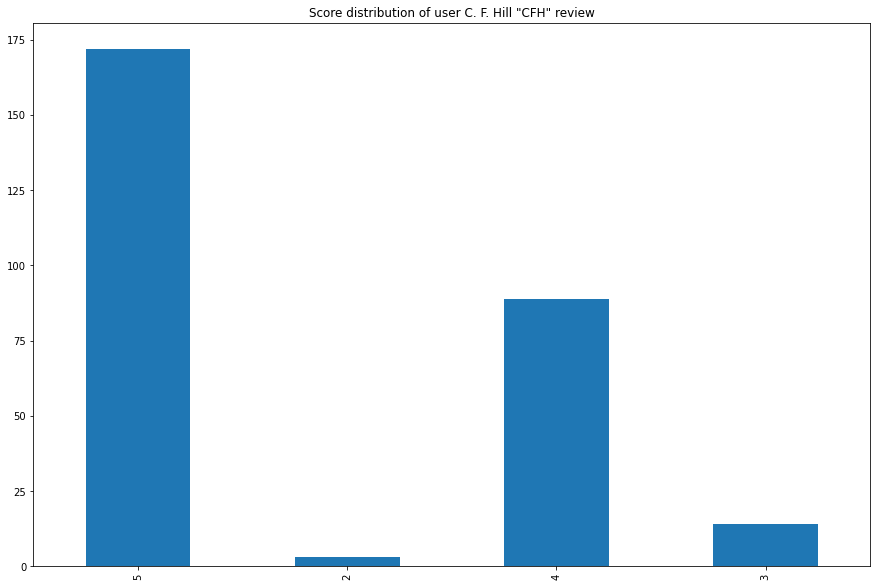

In [30]:
def plot_user(UserId):
    df_1user = odf[odf['UserId'] == UserId]['Score']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Score distribution of user {} review'.format(odf[odf['UserId'] == UserId]['ProfileName'].iloc[0]))

plot_user('A3OXHLG6DIBRW8')